# Natural Language Processing - Syntactic Analysis
Authors: [RedSkittleFox](https://github.com/RedSkittleFox), [DJAltair](https://github.com/DJAltair)

# 1. Sourcing
Created a **corpora** for every book fetched using the requests library

In [1]:
import requests

books = []

books.append(requests.get("https://wolnelektury.pl/media/book/txt/makuszynski-o-dwoch-takich-co-ukradli-ksiezyc.txt"))
books.append(requests.get("https://wolnelektury.pl/media/book/txt/gide-lochy-watykanu.txt"))
books.append(requests.get("https://wolnelektury.pl/media/book/txt/hrabia-monte-christo.txt"))
books.append(requests.get("https://wolnelektury.pl/media/book/txt/pies-baskervilleow.txt"))
books.append(requests.get("https://wolnelektury.pl/media/book/txt/dolega-mostowicz-prokurator-alicja-horn.txt"))

corpus = [x.text for x in books]

# 2. Preprocessing

Using the spacy library we preprocess the corporas.

In [2]:
import spacy

spacy.cli.download("pl_core_news_sm")

nlp = spacy.load("pl_core_news_sm")
nlp.max_length = 3000000
tokenized_corpus = [nlp(x) for x in corpus]

✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# 3. Word Frequency Visualization

Frequency visualization based on grammar tags (TAG) and parts of speach (POS).

In [3]:
from collections import defaultdict

grammatical_classes_books = []
pos_frequencies_books = []

for doc in tokenized_corpus:
  grammatical_classes = defaultdict(int)
  pos_frequencies = defaultdict(int)

  for token in doc:
    grammatical_classes[token.tag_] += 1
    pos_frequencies[token.pos_] += 1

  grammatical_classes_books.append(grammatical_classes)
  pos_frequencies_books.append(pos_frequencies)

print("Grammatical Classes Frequencies:", dict(grammatical_classes_books[0]))
print("\nPOS Tag Frequencies:", dict(pos_frequencies_books[0]))

Grammatical Classes Frequencies: {'SUBST': 22840, '_SP': 3133, 'PREP': 5552, 'NUM': 505, 'PRAET': 5078, 'ADJ': 6488, 'INTERP': 11444, 'FIN': 2998, 'CONJ': 3502, 'ADV': 3562, 'QUB': 4739, 'PACT': 173, 'PPRON3': 1614, 'INF': 1171, 'COMP': 1626, 'PPAS': 360, 'PRED': 614, 'IMPT': 378, 'ADJC': 3, 'BREV': 353, 'PPRON12': 1068, 'IMPS': 67, 'PCON': 255, 'PANT': 126, 'SIEBIE': 147, 'GER': 96, 'BEDZIE': 159, 'NUMCOL': 6, 'INTERJ': 238, 'DEPR': 3, 'ADJP': 16, 'ADJA': 8, 'BURK': 8, 'WINIEN': 5, 'AGLT': 1}

POS Tag Frequencies: {'PROPN': 1455, 'SPACE': 2951, 'ADP': 5535, 'NUM': 309, 'DET': 2288, 'PUNCT': 16374, 'PRON': 6237, 'VERB': 11217, 'NOUN': 12575, 'X': 48, 'ADJ': 5225, 'CCONJ': 3005, 'ADV': 3805, 'PART': 3282, 'AUX': 1448, 'SCONJ': 2277, 'INTJ': 305}


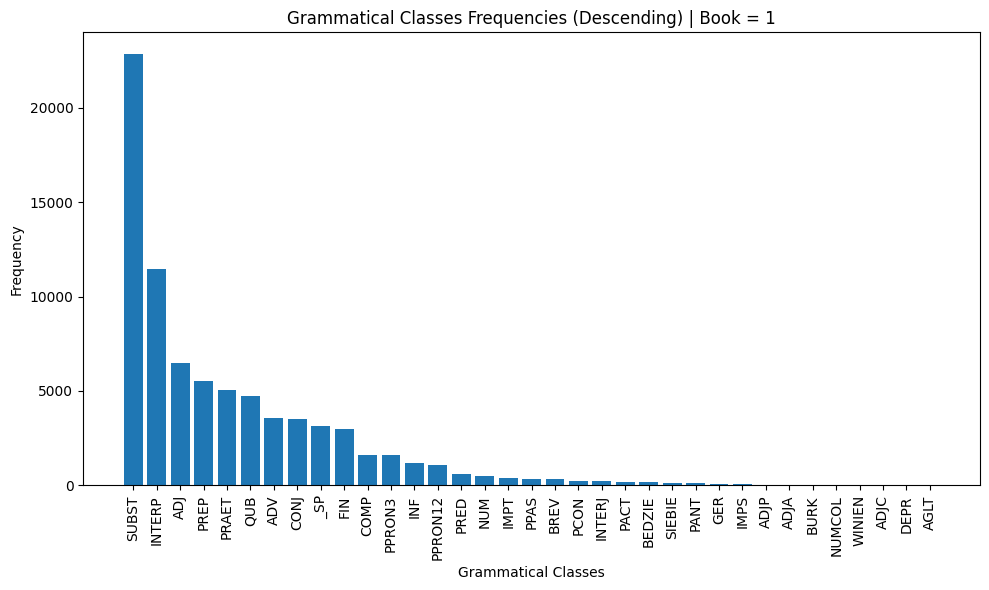

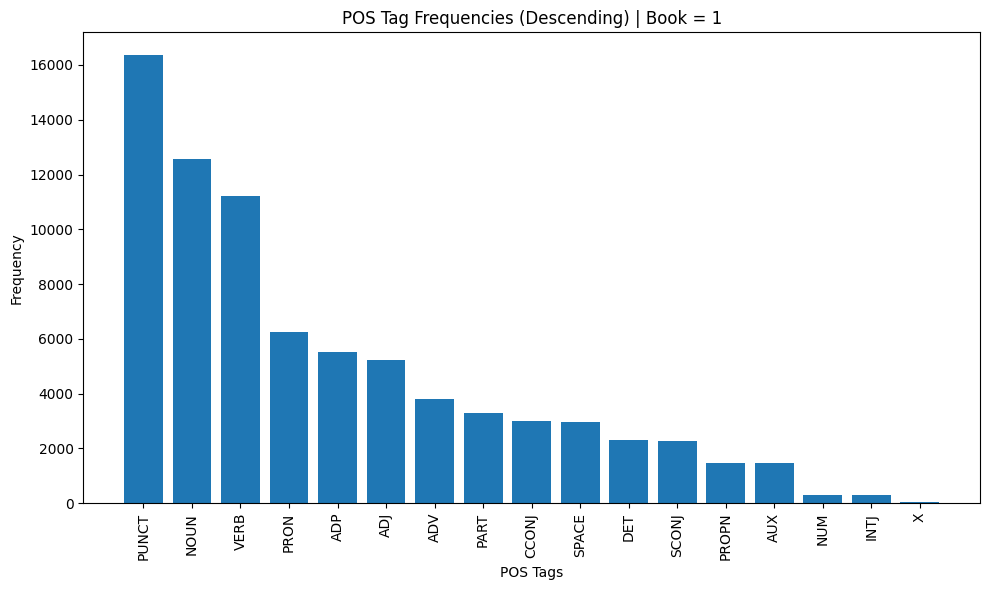

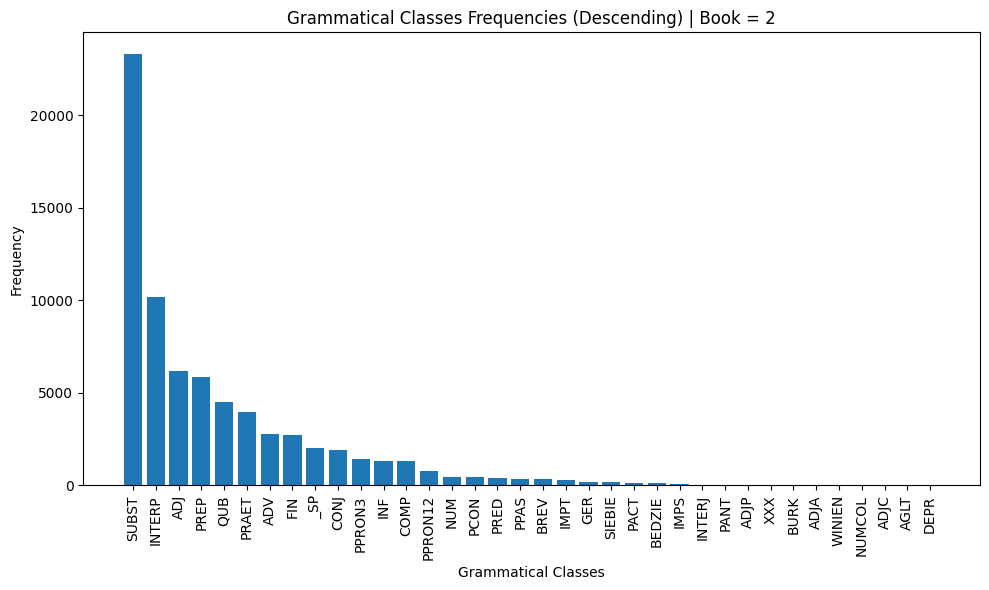

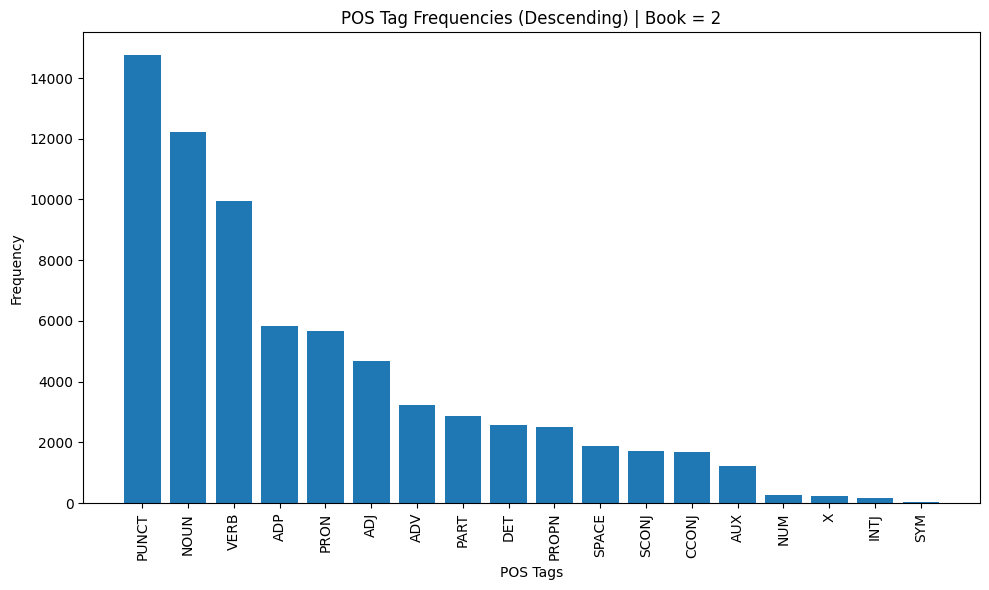

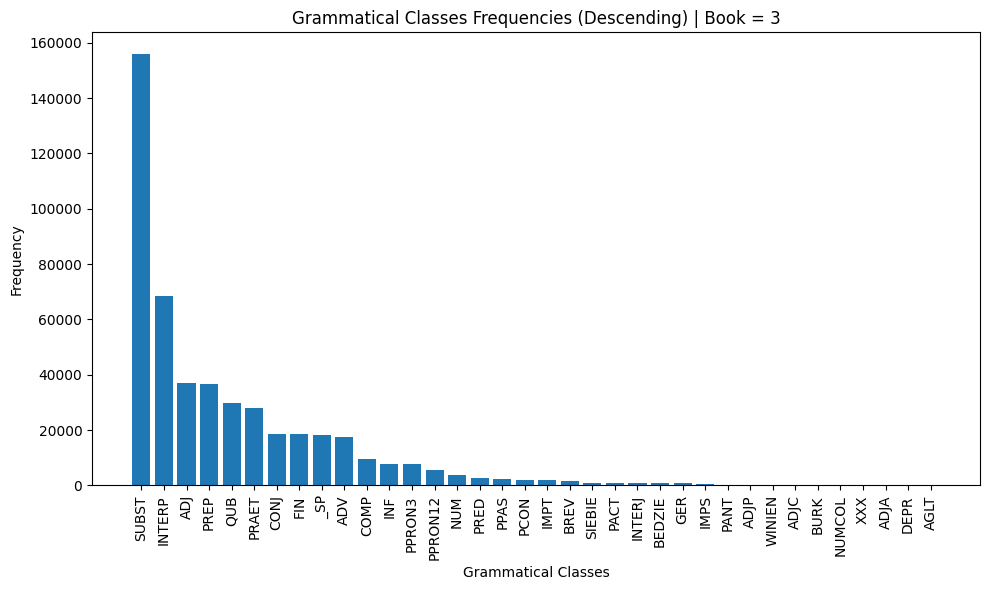

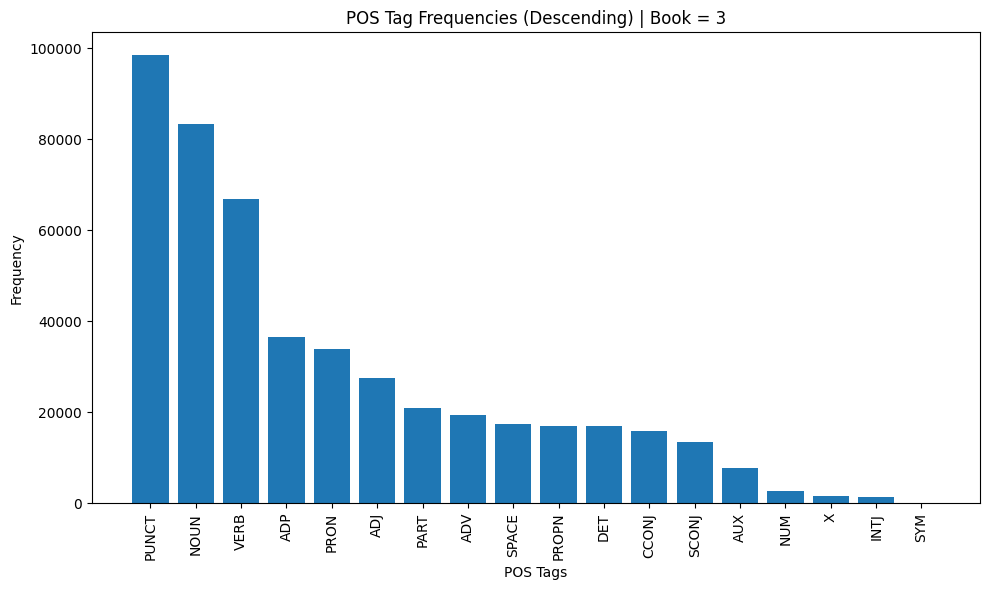

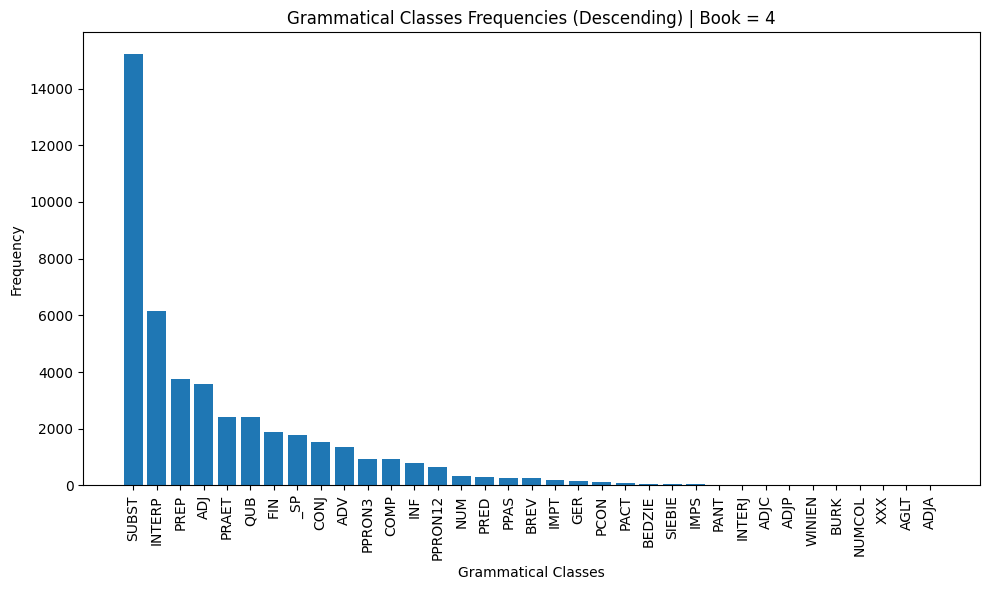

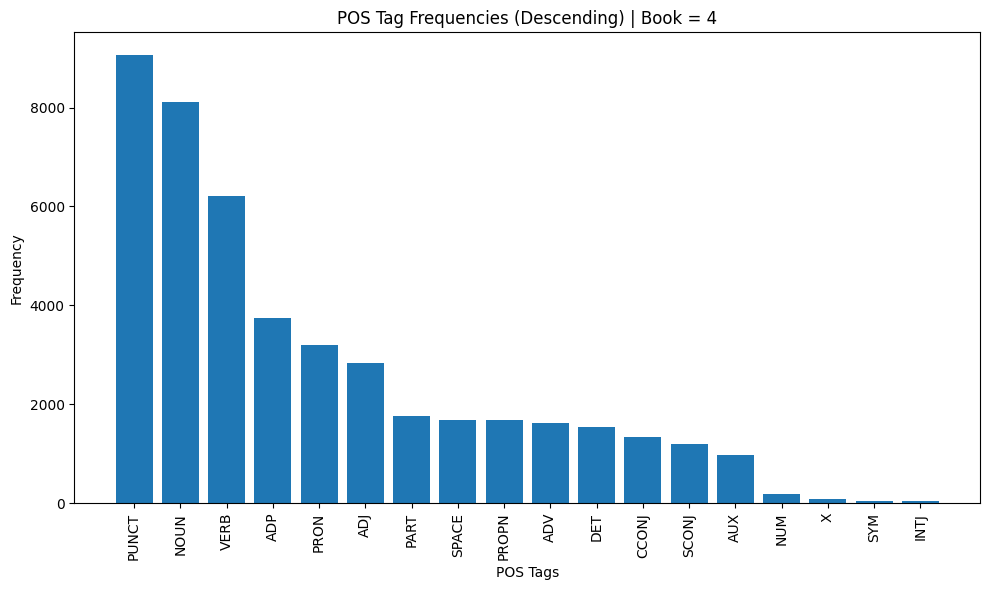

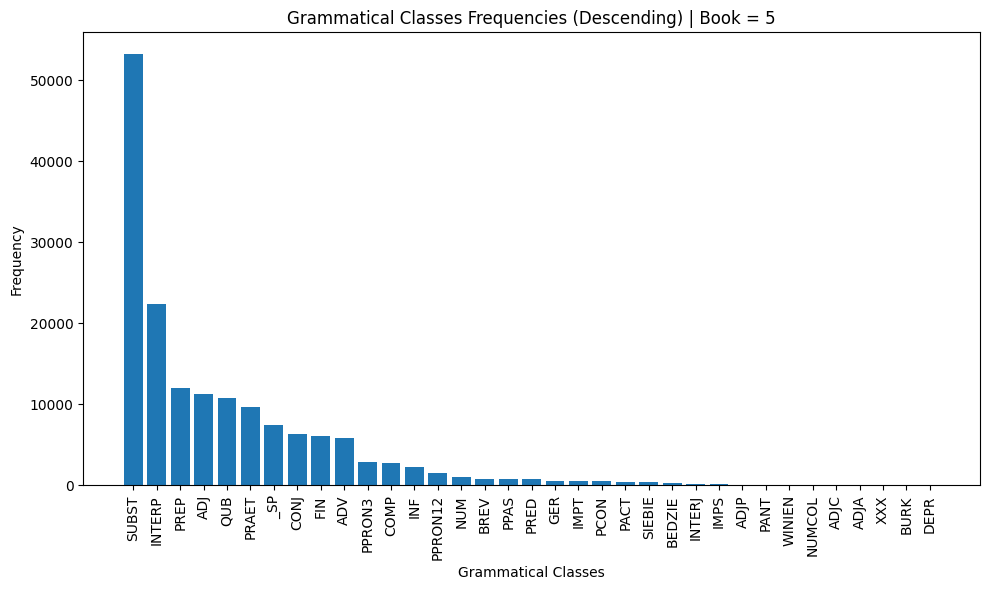

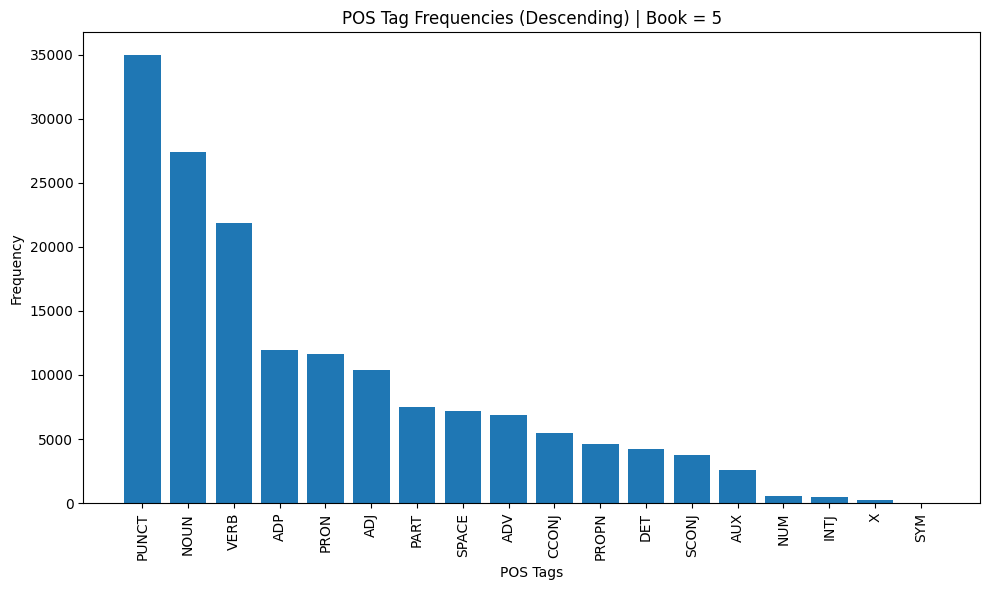

In [5]:
import matplotlib.pyplot as plt

for i, (grammatical_classes, pos_frequencies) in enumerate(zip(grammatical_classes_books, pos_frequencies_books)):
  sorted_grammatical_classes = dict(sorted(grammatical_classes.items(), key=lambda item: item[1], reverse=True))
  sorted_pos_frequencies = dict(sorted(pos_frequencies.items(), key=lambda item: item[1], reverse=True))

  plt.figure(figsize=(10, 6))
  plt.bar(sorted_grammatical_classes.keys(), sorted_grammatical_classes.values())
  plt.xticks(rotation=90)
  plt.xlabel("Grammatical Classes")
  plt.ylabel("Frequency")
  plt.title(f"Grammatical Classes Frequencies (Descending) | Book = {i + 1}")
  plt.tight_layout()

  plt.figure(figsize=(10, 6))
  plt.bar(sorted_pos_frequencies.keys(), sorted_pos_frequencies.values())
  plt.xticks(rotation=90)
  plt.xlabel("POS Tags")
  plt.ylabel("Frequency")
  plt.title(f"POS Tag Frequencies (Descending) | Book = {i + 1}")
  plt.tight_layout()

plt.show()

# 4. Visualization of noun lemmas frequency

In [6]:
noun_lemmas_count = []

for doc in tokenized_corpus:
  noun_lemmas = defaultdict(int)
  for token in doc:
    if token.pos_ == "NOUN":
      noun_lemmas[token.lemma_] += 1
  noun_lemmas_count.append(dict(noun_lemmas))

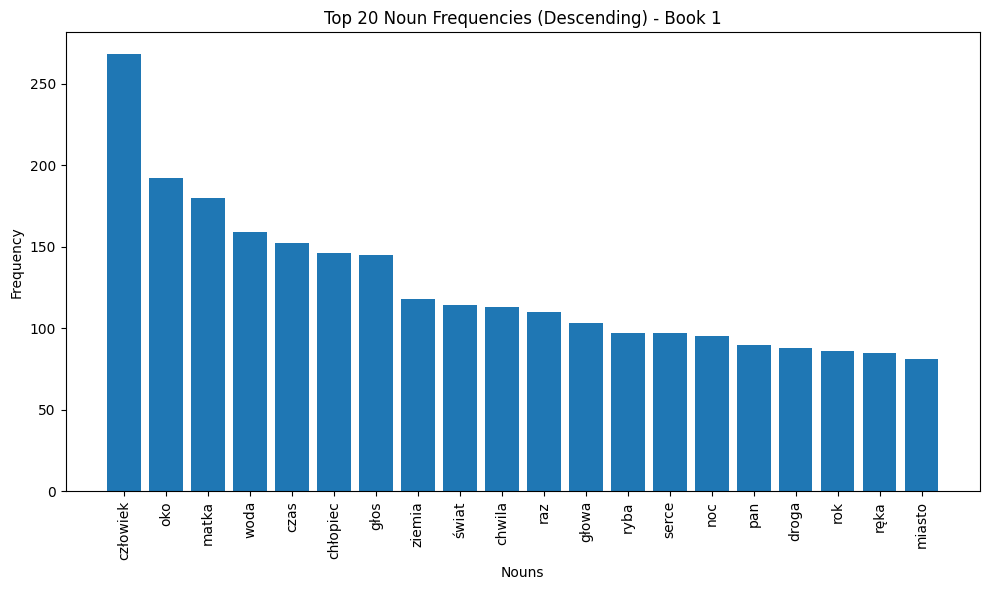

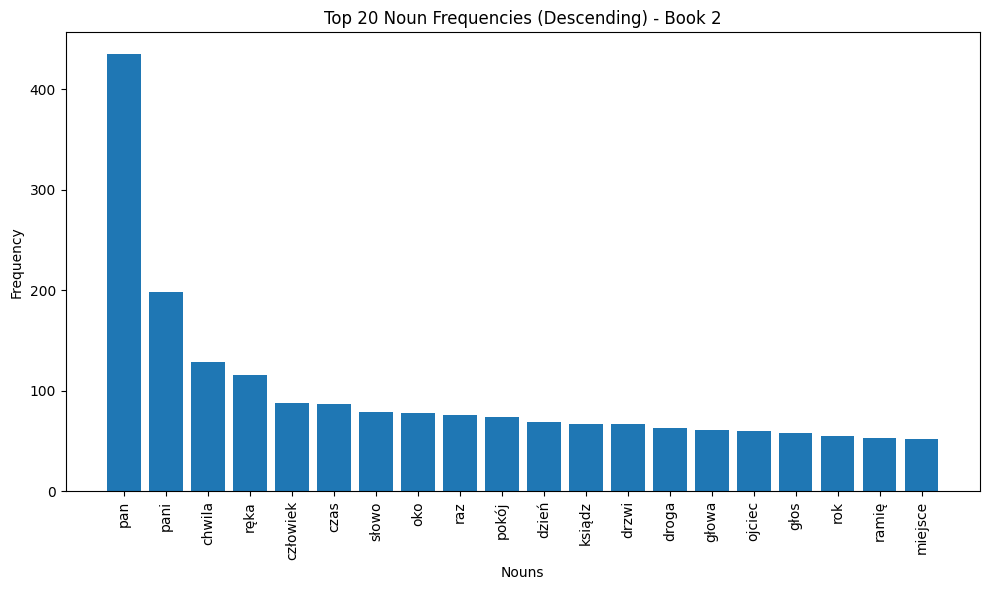

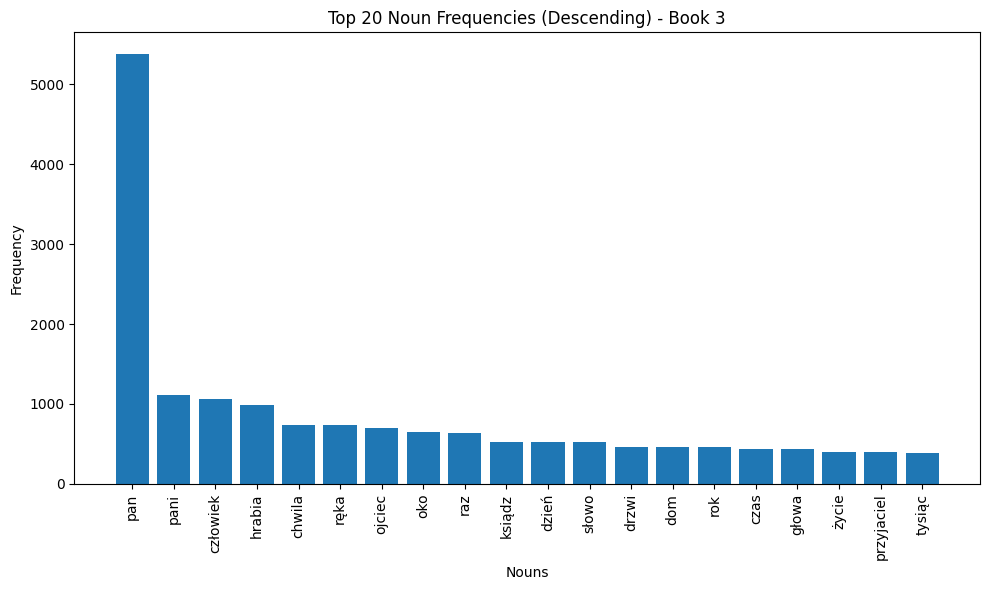

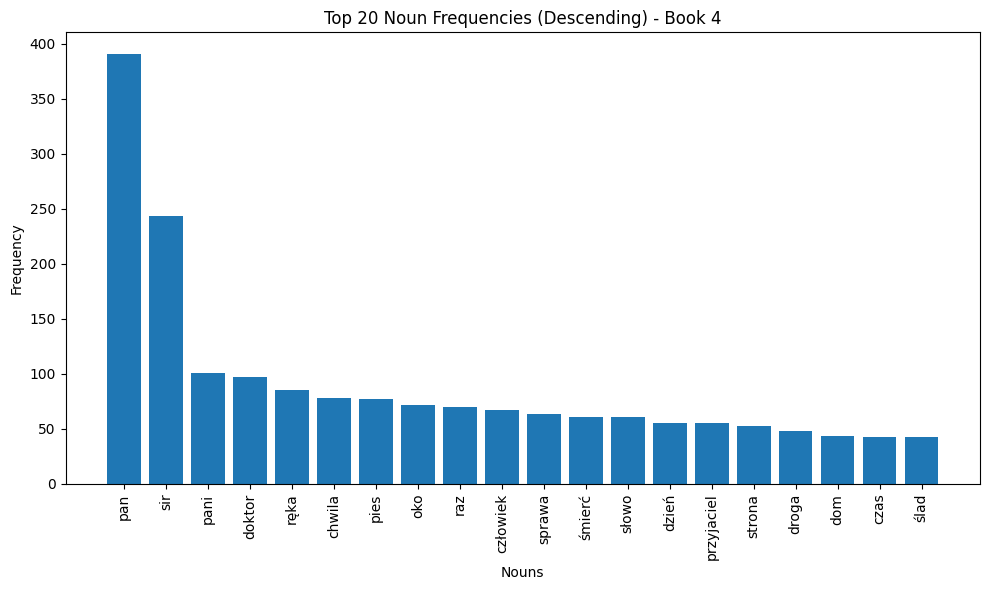

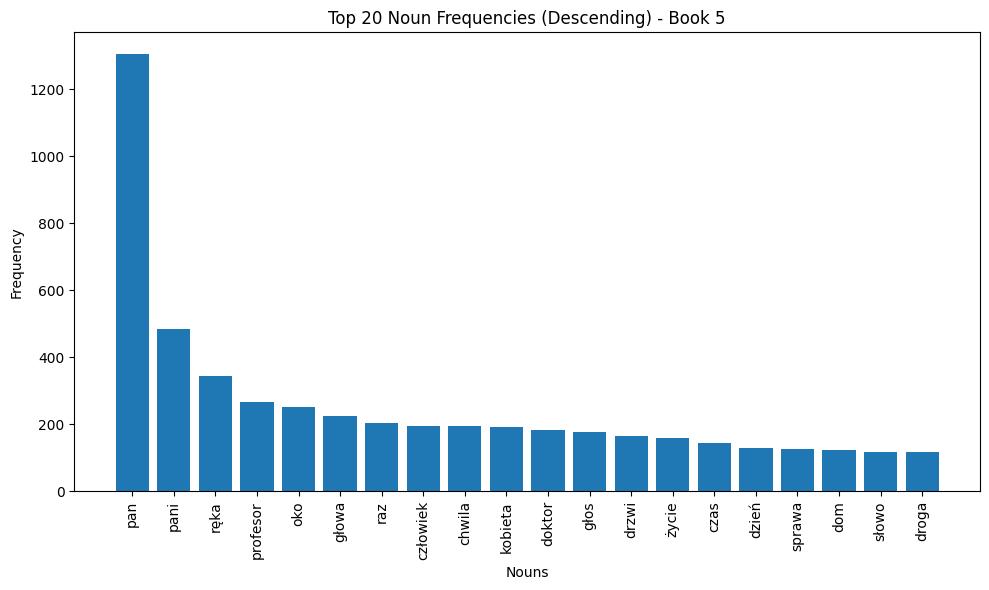

In [7]:
import matplotlib.pyplot as plt
from collections import defaultdict

for i, noun_dict in enumerate(noun_lemmas_count):
    sorted_noun_dict = dict(sorted(noun_dict.items(), key=lambda item: item[1], reverse=True))
    top_20_words = list(sorted_noun_dict.keys())[:20]
    top_20_counts = list(sorted_noun_dict.values())[:20]

    plt.figure(figsize=(10, 6))
    plt.bar(top_20_words, top_20_counts)
    plt.xticks(rotation=90)
    plt.xlabel("Nouns")
    plt.ylabel("Frequency")
    plt.title(f"Top 20 Noun Frequencies (Descending) - Book {i+1}")
    plt.tight_layout()
    plt.show()

# 5. TFIDF matrix

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus_nouns = []
for doc in tokenized_corpus:
    nouns = [token.lemma_.lower() for token in doc if token.pos_ == "NOUN"]
    corpus_nouns.append(nouns)

corpus_string = []
for corpus in corpus_nouns:
  corpus_string.append(' '.join(corpus))

word_set = {x for xs in corpus_nouns for x in xs}

tfidf = TfidfVectorizer(vocabulary=word_set).fit_transform(raw_documents=corpus_string)
tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 25004 stored elements and shape (5, 15869)>

# 6. Word Cloud

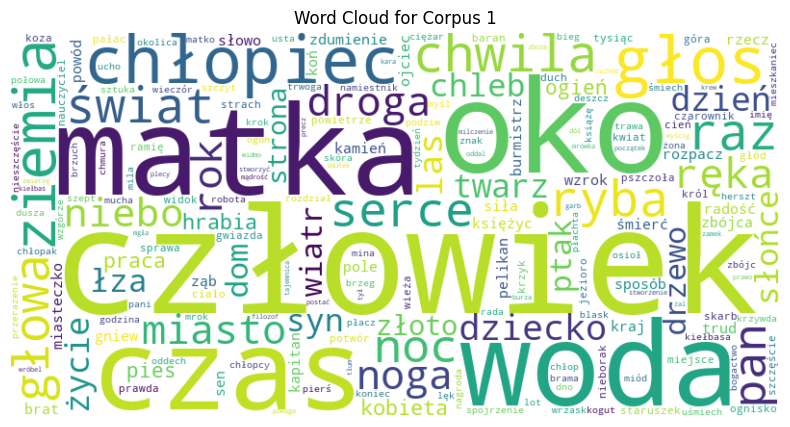

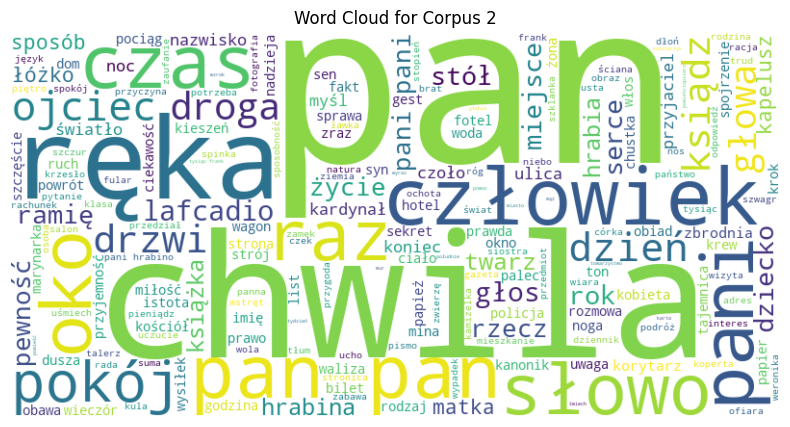

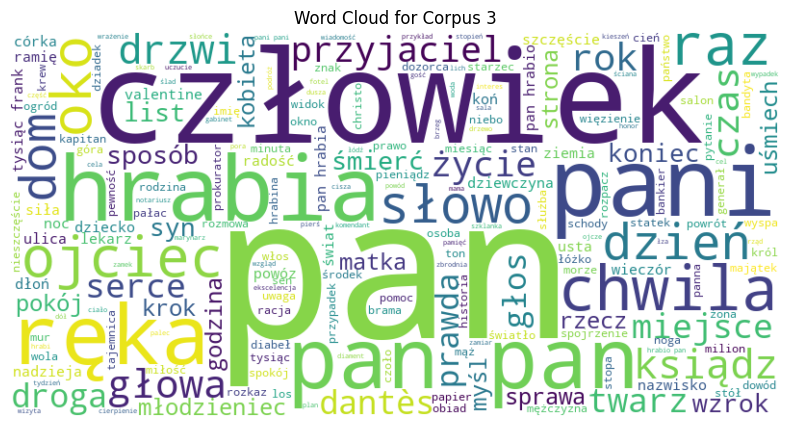

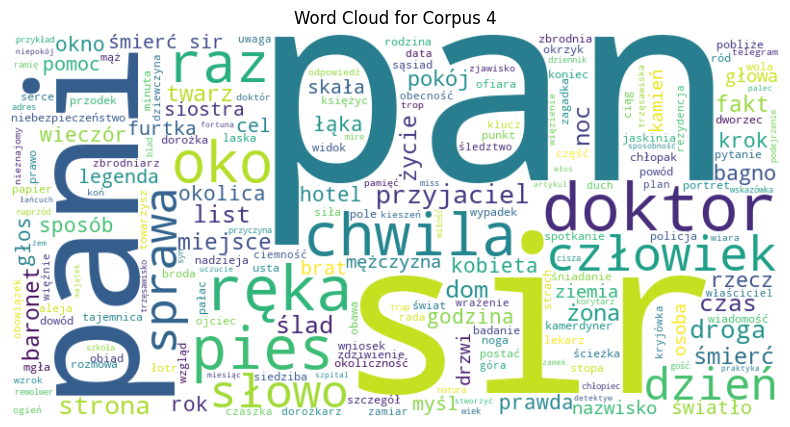

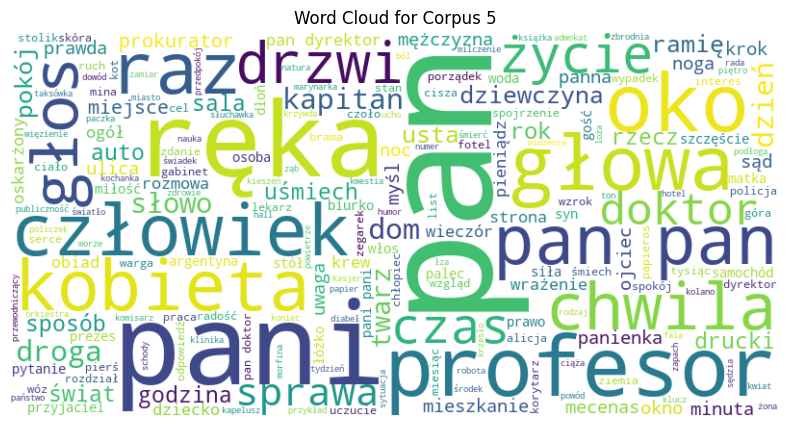

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i, corpus_str in enumerate(corpus_string):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(corpus_str)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Corpus {i+1}")
    plt.show()

# 7. Ambiguities

In [17]:
from collections import Counter

doc = tokenized_corpus[2]
subject_verb_pairs = []
for i, token in enumerate(doc):
    if token.dep_ == "nsubj" and token.head.pos_ == "VERB":
        if token.pos_ not in ["PRON", "DET"]:
            subject = token.lemma_
            verb = token.head.lemma_
            subject_verb_pairs.append((subject, verb))

pair_counts = Counter(subject_verb_pairs)

most_common_pairs = pair_counts.most_common(10)

print("10 Most Frequent Subject-Verb Pairs:")
for pair, count in most_common_pairs:
    print(f"Subject: {pair[0]}, Verb: {pair[1]}, Count: {count}")

10 Most Frequent Subject-Verb Pairs:
Subject: pan, Verb: mieć, Count: 154
Subject: Monte, Verb: rzec, Count: 129
Subject: pan, Verb: wiedzieć, Count: 110
Subject: hrabia, Verb: rzec, Count: 96
Subject: pan, Verb: mówić, Count: 78
Subject: Albert, Verb: rzec, Count: 76
Subject: pan, Verb: móc, Count: 64
Subject: pan, Verb: chcieć, Count: 64
Subject: Danglars, Verb: rzec, Count: 63
Subject: Caderousse, Verb: rzec, Count: 63


# 8. Subjects and Verbs

Snippet below selects 5 (verb, subject) pairs found by morfeusz.[tekst linku](https://)

In [18]:
import morfeusz2
import random

morf = morfeusz2.Morfeusz()

doc = tokenized_corpus[2]

ambiguous_words = []

for sent in doc.sents:
    for token in sent:
        analysis = morf.analyse(token.text)
        if len(analysis) > 1:
            ambiguous_words.append((token.text, analysis))

counter = 0

random.shuffle(ambiguous_words)

for word, analyses in ambiguous_words:
    if counter == 10:
        break

    if any('nazwisko' in analysis[2][3] or 'imię' in analysis[2][3] for analysis in analyses):
      continue

    print(f"Word: {word}")

    for i, analysis in enumerate(analyses):
        print(f"  Analysis {i + 1}: {analysis}")

    counter += 1
    print("---")

Word: w
  Analysis 1: (0, 1, ('w', 'w', 'prep:acc:nwok', [], []))
  Analysis 2: (0, 1, ('w', 'w', 'prep:loc:nwok', [], []))
---
Word: że
  Analysis 1: (0, 1, ('że', 'że:M', 'comp', [], []))
  Analysis 2: (0, 1, ('że', 'że:T', 'part', [], []))
---
Word: właśnie
  Analysis 1: (0, 1, ('właśnie', 'właśnie:D', 'adv', [], []))
  Analysis 2: (0, 1, ('właśnie', 'właśnie:I', 'interj', [], []))
  Analysis 3: (0, 1, ('właśnie', 'właśnie:T', 'part', [], []))
---
Word: uzasadnione
  Analysis 1: (0, 1, ('uzasadnione', 'uzasadniony', 'adj:pl:acc:m2.m3.f.n:pos', [], []))
  Analysis 2: (0, 1, ('uzasadnione', 'uzasadniony', 'adj:pl:nom.voc:m2.m3.f.n:pos', [], []))
  Analysis 3: (0, 1, ('uzasadnione', 'uzasadniony', 'adj:sg:acc:n:pos', [], []))
  Analysis 4: (0, 1, ('uzasadnione', 'uzasadniony', 'adj:sg:nom.voc:n:pos', [], []))
  Analysis 5: (0, 1, ('uzasadnione', 'uzasadnić', 'ppas:pl:nom.acc.voc:m2.m3.f.n:perf:aff', [], []))
  Analysis 6: (0, 1, ('uzasadnione', 'uzasadnić', 'ppas:sg:nom.acc.voc:n:perf: